In [1]:
path = "/home/zlatantien/Project/Data_mining/Lab01"
import os
os.chdir(path)
print("All Files in the Current Folder :")
os.listdir()

All Files in the Current Folder :


['Telco Customer Churn.csv',
 '19110471_NguyenKhoaTanTien_DM Lab01.html',
 'Practice_lab1.ipynb',
 'CustomerChurn.csv',
 '.ipynb_checkpoints',
 '19110471_NguyenKhoaTanTien_DM Lab01.ipynb',
 'Lab01-Data Mining-Data Frame Tutorials - Requirements.pdf']

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco Customer Churn.csv")

display(df.head())
print("Shape: ",df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shape:  (7043, 21)


In [4]:
print("Index of DF: ", df.index)

Index of DF:  RangeIndex(start=0, stop=7043, step=1)


In [5]:
print("Column of DataFrame: ", list(df.columns))


Column of DataFrame:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
display(df.info())
print("Info of DataFrame")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

Info of DataFrame


In [7]:
print("Change TotalCharges from object to float64:")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
print("New type of TotalCharges: ", df["TotalCharges"].dtypes)

Change TotalCharges from object to float64:
New type of TotalCharges:  float64


In [8]:
print("Count missing value: ")
display(df.isnull().sum())

Count missing value: 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
print("Drop NA DataFrame: ")
df = df.dropna()
print("Count missing value after drop NA: ")
display(df.isnull().sum())

Drop NA DataFrame: 
Count missing value after drop NA: 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
print("Extract the categorical and numeric columns")
CatFeatures = [col for col in df.columns if df[col].dtypes in ["object", "bool"]]
NumFeatures = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
print("- Categorical Features :", CatFeatures)
print("- Numeric Features :", NumFeatures)

Extract the categorical and numeric columns
- Categorical Features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
- Numeric Features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
print("The statistics table of Numeric Features: ")
display(df.describe())

The statistics table of Numeric Features: 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
print("The statistics table of Categorical Features: ")
display(df[CatFeatures].describe(include='all'))

The statistics table of Categorical Features: 


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [13]:
print("Count gender: ")
display(df['gender'].value_counts())

print("Mean and std of TotalCharges: ")
print("Mean TotalCharges: ",df['TotalCharges'].mean())
print("Std TotalCharges: ",df['TotalCharges'].std(),"\n")

print("Min and max of MonthlyCharges: ")
print("Min MonthlyCharges: ",df['MonthlyCharges'].min())
print("Max MonthlyCharges: ",df['MonthlyCharges'].max(),"\n")

print("How many cases of Churn ?")
print(df["Churn"].value_counts(),"\n")

print("\nHow many MultipleLines are there in the data ? \n\t", df["MultipleLines"].unique())
print("\nHow many InternetService are there in the data ? \n\t", df["InternetService"].unique())
print("\nHow many PaymentMethod are there in the data ? \n\t", df["PaymentMethod"].unique())

Count gender: 


Male      3549
Female    3483
Name: gender, dtype: int64

Mean and std of TotalCharges: 
Mean TotalCharges:  2283.3004408418697
Std TotalCharges:  2266.7713618831453 

Min and max of MonthlyCharges: 
Min MonthlyCharges:  18.25
Max MonthlyCharges:  118.75 

How many cases of Churn ?
No     5163
Yes    1869
Name: Churn, dtype: int64 


How many MultipleLines are there in the data ? 
	 ['No phone service' 'No' 'Yes']

How many InternetService are there in the data ? 
	 ['DSL' 'Fiber optic' 'No']

How many PaymentMethod are there in the data ? 
	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
print("Get the rows from index 450 to 455 of columns 'customerID', 'Contract', 'PaymentMethod', 'TotalCharges', 'Churn': ")
ex = df.loc[450:455, ['customerID', 'Contract', 'PaymentMethod', 'TotalCharges', 'Churn']]
ex = ex.reset_index(drop=True)
display(ex)

Get the rows from index 450 to 455 of columns 'customerID', 'Contract', 'PaymentMethod', 'TotalCharges', 'Churn': 


,customerID,Contract,PaymentMethod,TotalCharges,Churn
0,8592-PLTMQ,One year,Mailed check,1642.75,No
1,5760-WRAHC,Month-to-month,Mailed check,1545.40,No
2,8847-GEOOQ,Month-to-month,Bank transfer (automatic),3582.40,No
3,0256-LTHVJ,Month-to-month,Electronic check,2227.10,Yes
4,4785-FCIFB,Two year,Mailed check,1417.90,No
5,8313-NDOIA,Month-to-month,Electronic check,2494.65,No


How we can draw chart for a numeric features ?


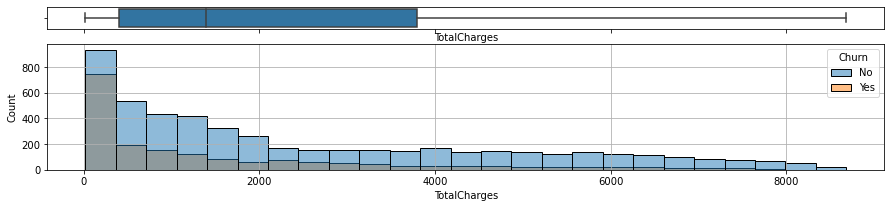

In [15]:
print("How we can draw chart for a numeric features ?")
feature = "TotalCharges"
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.set_figheight(3)
f.set_figwidth(15)
sns.boxplot(df[feature], ax=ax_box)
sns.histplot(data=df, x=feature, ax=ax_hist, hue="Churn")
plt.grid()
plt.show()

How we can draw chart for a numeric feature according to a categorical feature ?


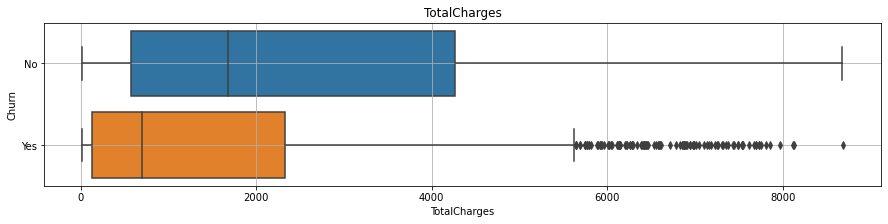

In [16]:
print("How we can draw chart for a numeric feature according to a categorical feature ?")
feature = "TotalCharges"
plt.figure(figsize = (15,3))
sns.boxplot(y ='Churn', x = feature, data = df)
plt.title(feature)
plt.grid()
plt.show()

How we can draw chart for a categorical feature ?


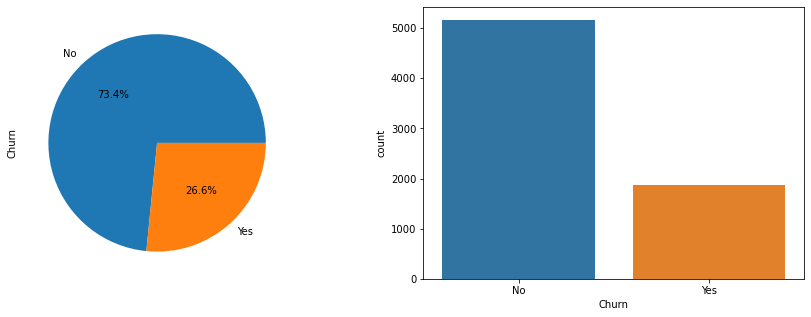

In [17]:
print("How we can draw chart for a categorical feature ?")
feature = "Churn"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df[feature].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df[feature])
plt.show()

How we can draw chart for a categorical feature ?


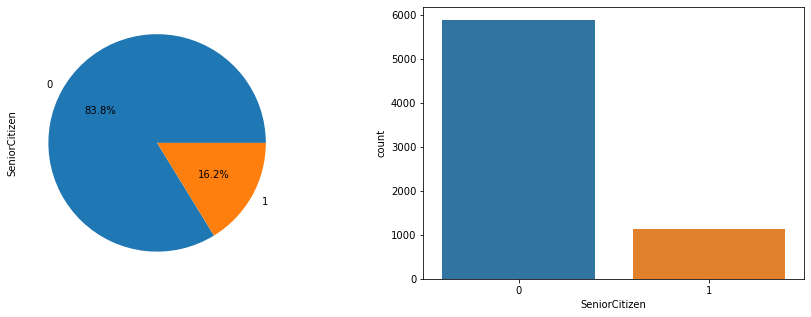

In [18]:
print("How we can draw chart for a categorical feature ?")
feature = "SeniorCitizen"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df[feature].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df[feature])
plt.show()

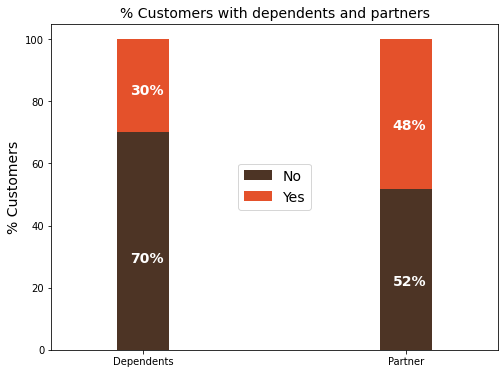

In [19]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])

df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [20]:
df4 = df.iloc[:,1:]
df4['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df4['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df4)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Show the correlation of features with Churn:


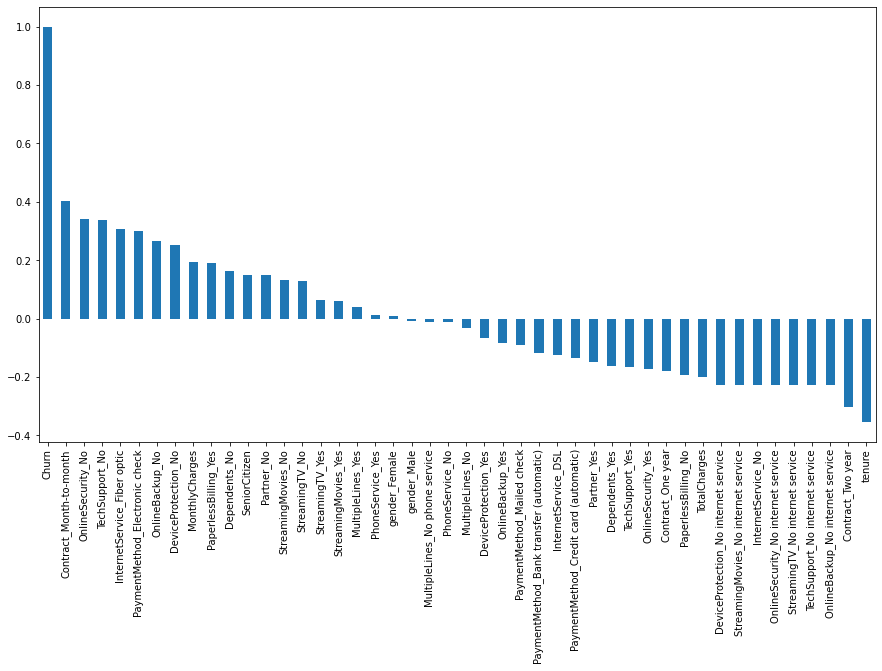

In [21]:
print("Show the correlation of features with Churn:")

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
print("Split data:")
feature_Cus = ['customerID', 'gender', 'SeniorCitizen', 'Partner', \
    'Dependents', 'tenure', 'Contract',	'PaperlessBilling',	\
        'PaymentMethod',	'MonthlyCharges',	'TotalCharges',	'Churn']
df_Cus = df[feature_Cus].copy()
display(df_Cus.head())

Split data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
print("Service data: ")
feature_Ser = list(set(df.columns) - set(feature_Cus))
df_Ser = df[feature_Ser].copy()
display(df_Ser.head())

Service data: 


,TechSupport,StreamingMovies,OnlineBackup,StreamingTV,PhoneService,DeviceProtection,OnlineSecurity,MultipleLines,InternetService
0,No,No,Yes,No,No,No,No,No phone service,DSL
1,No,No,No,No,Yes,Yes,Yes,No,DSL
2,No,No,Yes,No,Yes,No,Yes,No,DSL
3,Yes,No,No,No,No,Yes,Yes,No phone service,DSL
4,No,No,No,No,Yes,No,No,No,Fiber optic


In [25]:
print("Merge data: ")
df_merger = pd.concat([df_Cus, df_Ser], axis=1)
display(df_merger.head())

Merge data: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,Churn,TechSupport,StreamingMovies,OnlineBackup,StreamingTV,PhoneService,DeviceProtection,OnlineSecurity,MultipleLines,InternetService
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.85,...,No,No,No,Yes,No,No,No,No,No phone service,DSL
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.95,...,No,No,No,No,No,Yes,Yes,Yes,No,DSL
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.85,...,Yes,No,No,Yes,No,Yes,No,Yes,No,DSL
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.30,...,No,Yes,No,No,No,No,Yes,Yes,No phone service,DSL
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.70,...,Yes,No,No,No,No,Yes,No,No,No,Fiber optic


In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
print("filter data by condition: ")
Condition1 = df["MonthlyCharges"] > 50
Condition2 = df["PaymentMethod"] == "Electronic check"
df_over30_EleCheck = df[Condition1 & Condition2].copy()
display(df_over30_EleCheck.head())
print(df_over30_EleCheck.shape)

filter data by condition: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
19,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No


(1969, 21)


In [28]:
value1, value2 = 50, "Electronic check"
df_less50_Elecheck = df.query("`MonthlyCharges` < @value1 and `PaymentMethod` == @value2")
display(df_less50_Elecheck.head())
print(df_less50_Elecheck.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
71,0731-EBJQB,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.40,1090.65,No
101,3679-XASPY,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.45,19.45,No


(395, 21)


In [29]:
print("How we can merge two data into one by rows ?")
data_merge = pd.concat([df_over30_EleCheck, df_less50_Elecheck])
display(data_merge.head())
print(data_merge.shape)

How we can merge two data into one by rows ?


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
19,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No


(2364, 21)


In [30]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [31]:
print("How we can group by PaymentMethod and count on Churn, sum on MonthlyCharges and Average on TotalCharges?")
PM_df = pd.DataFrame()
PM_df['Count on Churn'] = df.groupby("PaymentMethod")["Churn"].count()
PM_df['Sum on MonthlyCharges'] = df.groupby("PaymentMethod")["MonthlyCharges"].sum()
PM_df['Average on TotalCharges'] = df.groupby("PaymentMethod")["TotalCharges"].mean()
display(PM_df.head())
print(PM_df.shape)

How we can group by PaymentMethod and count on Churn, sum on MonthlyCharges and Average on TotalCharges?


,Count on Churn,Sum on MonthlyCharges,Average on TotalCharges
PaymentMethod,,,
Bank transfer (automatic),1542,103631.0,3079.299546
Credit card (automatic),1521,101175.8,3071.396022
Electronic check,2365,180345.0,2090.868182
Mailed check,1604,70509.2,1054.483915


(4, 3)


In [32]:
print("How we can join data with PM_df on the PaymentMethod information to create new information about PaymentMethod")
PM_df['PaymentMethod'] = PM_df.index
PM_df.reset_index(drop=True, inplace=True)
display(PM_df.head())
df = pd.merge(df, PM_df, left_on='PaymentMethod', right_on='PaymentMethod')
display(df.head())
print(df.shape)

How we can join data with PM_df on the PaymentMethod information to create new information about PaymentMethod


,Count on Churn,Sum on MonthlyCharges,Average on TotalCharges,PaymentMethod
0,1542,103631.0,3079.299546,Bank transfer (automatic)
1,1521,101175.8,3071.396022,Credit card (automatic)
2,2365,180345.0,2090.868182,Electronic check
3,1604,70509.2,1054.483915,Mailed check


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count on Churn,Sum on MonthlyCharges,Average on TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2365,180345.0,2090.868182
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2365,180345.0,2090.868182
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,2365,180345.0,2090.868182
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2365,180345.0,2090.868182
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,2365,180345.0,2090.868182


(7032, 24)
